In [1]:
!pip install -q plotly scikit-learn

In [2]:
import numpy as np 
import pandas as pd

In [3]:


df = pd.read_csv(r'WineQT.csv')

df.columns = [c.lower().replace(' ','_') for c in df.columns]

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**Data Validation**

In [4]:
# Expected data types
expected_dtypes = {
    'fixed_acidity': 'float64',
    'volatile_acidity': 'float64',
    'citric_acid': 'float64',
    'residual_sugar': 'float64',
    'chlorides': 'float64',
    'free_sulfur_dioxide': 'float64',
    'total_sulfur_dioxide': 'float64',
    'density': 'float64',
    'ph': 'float64',
    'sulphates': 'float64',
    'alcohol': 'float64',
    'quality': 'int64',
    "id" : "int64"
}

# Check for incorrect data types
incorrect_dtypes = {col: dtype for col, dtype in df.dtypes.items() if dtype != expected_dtypes[col]}

print("Incorrect df types:")
print(None)

# Convert to the correct df types if needed
print("Data is correct with following:")
for col, dtype in incorrect_dtypes.items():
    df[col] = df[col].astype(expected_dtypes[col])

# Verify the conversion
print(df.dtypes)

Incorrect df types:
None
Data is correct with following:
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
id                        int64
dtype: object


**Duplicate Values**

In [5]:
print("\nNumber of duplicated rows : ", df.drop(columns=['id']).duplicated().sum(),"\n")


Number of duplicated rows :  125 



**Missing Values**

In [6]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
id                      0
dtype: int64

### Feature Selection

In [7]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol']

X = df[features]

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X = X_scaled

c:\Users\rjn\miniconda3\envs\gpt\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



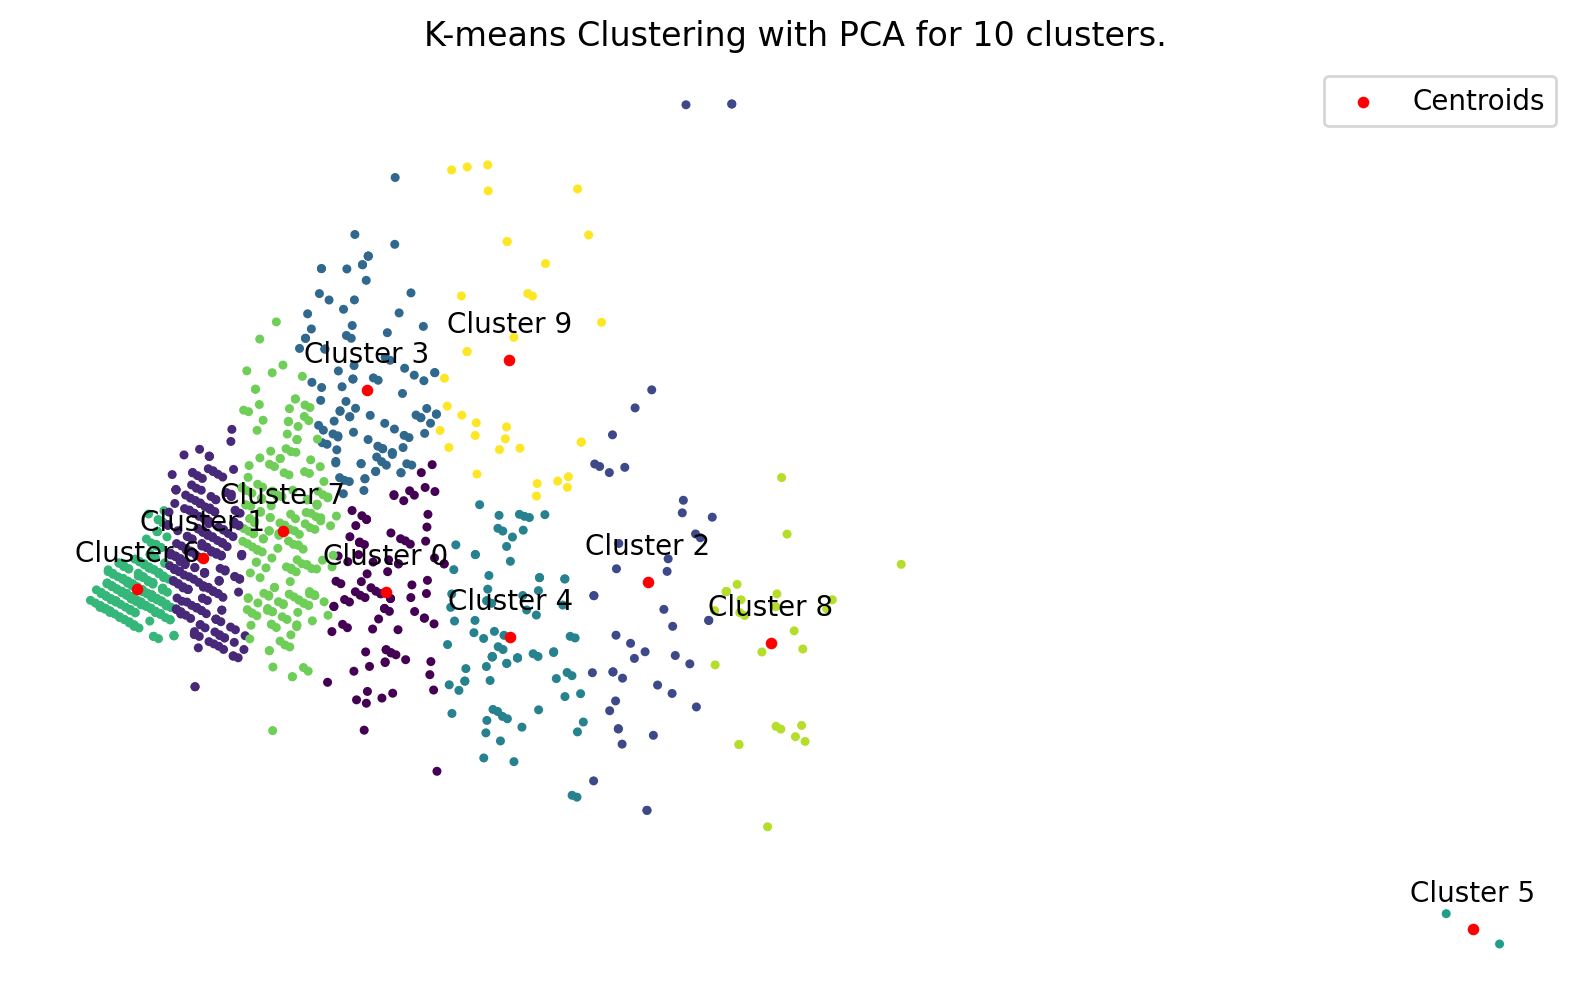

In [38]:
CLUSTER_NUMBER = 10

kmeans = KMeans(n_clusters=CLUSTER_NUMBER,init="k-means++", random_state=42, n_init="auto")

kmeans.fit(X)

# Get cluster labels
label = kmeans.labels_
# Add the cluster labels to the original dataframe
df['cluster'] = label
centroids = kmeans.cluster_centers_

# 2D Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)


plt.figure(figsize=(10, 6))
# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with PCA for {CLUSTER_NUMBER} clusters.')

# Annotate the clusters
for i, centroid in enumerate(centroids_pca):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), 
                 textcoords="offset points", xytext=(0,10), ha='center')


# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=10, c='red', label='Centroids')
plt.legend()
plt.axis("off")
plt.show()

In [30]:
# import plotly.express as px
# import plotly.graph_objects as go


# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X)

# # Run K-Means clustering
# kmeans = KMeans(n_clusters=10, random_state=42)
# kmeans.fit(X_pca)
# labels = kmeans.labels_
# centroids = kmeans.cluster_centers_

# # Create a DataFrame for Plotly
# df_pca = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
# df_pca['Cluster'] = labels

# # Plot the 3D scatter plot
# fig = px.scatter_3d(
#     df_pca, 
#     x='PCA Component 1', 
#     y='PCA Component 2', 
#     z='PCA Component 3', 
#     color='Cluster',
#     title='K-means Clustering with PCA',
#     opacity=0.7
# )

# # Add centroids
# fig.add_trace(
#     go.Scatter3d(
#         x=centroids[:, 0], 
#         y=centroids[:, 1], 
#         z=centroids[:, 2],
#         mode='markers+text',
#         marker=dict(size=5, color='red'),
#         text=['Centroid {}'.format(i) for i in range(len(centroids))],
#         textposition='top center'
#     )
# )

# fig.update_layout(height=800,width=800)

# fig.show()


c:\Users\rjn\miniconda3\envs\gpt\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



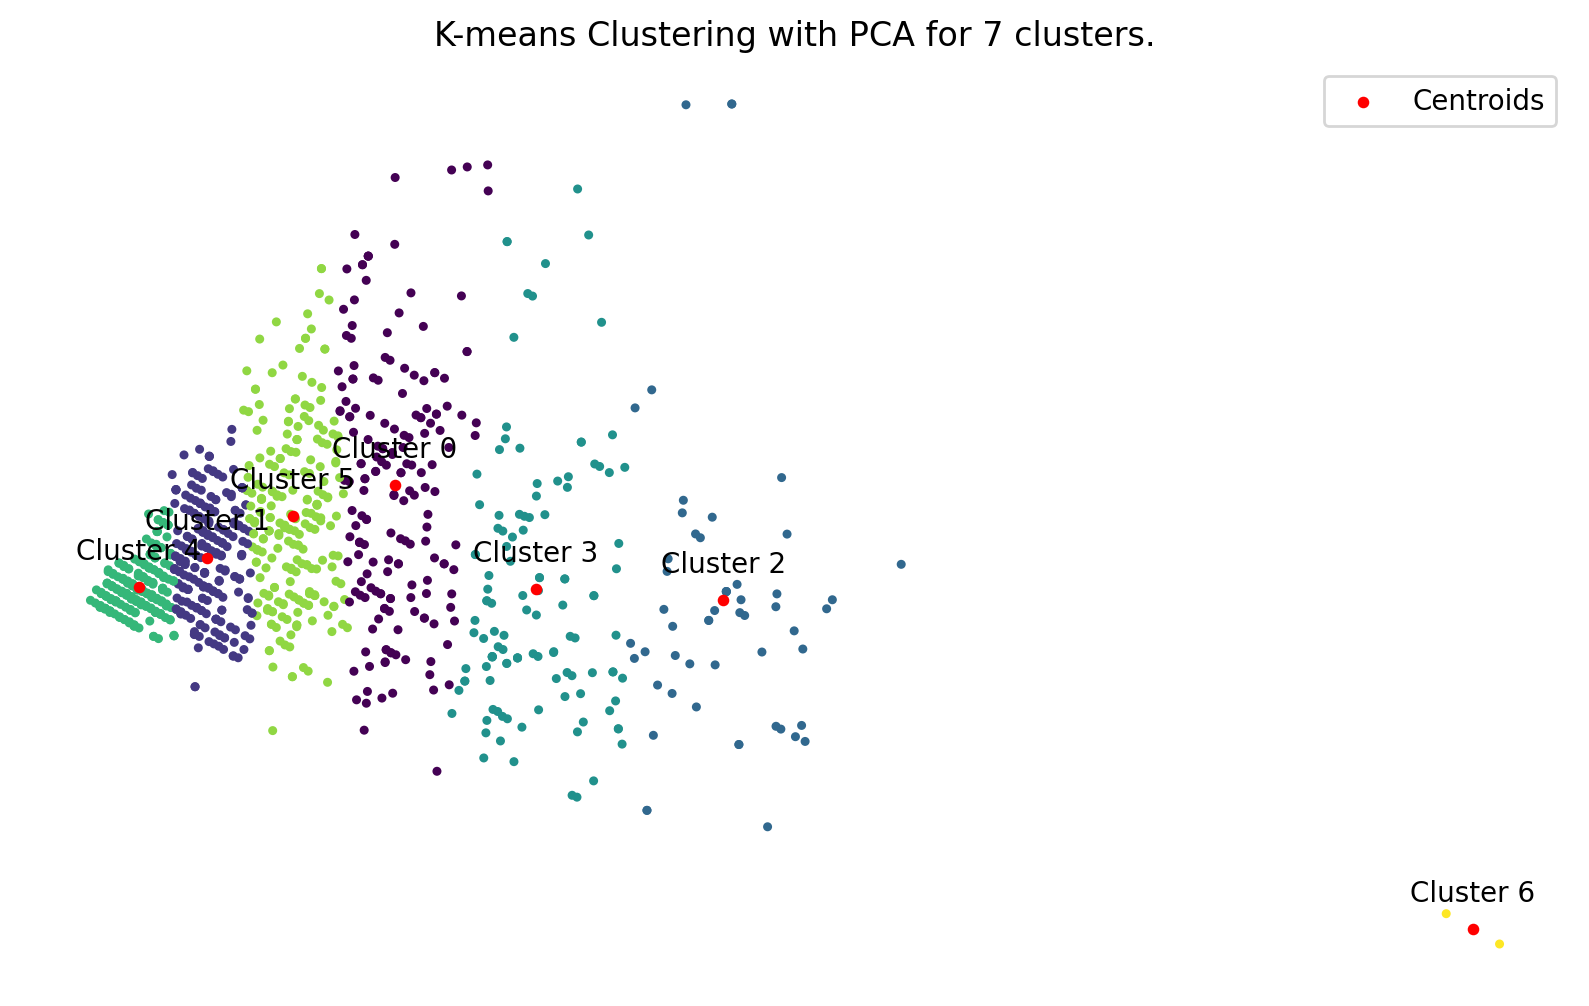

In [37]:
CLUSTER_NUMBER = 7
kmeans = KMeans(n_clusters=CLUSTER_NUMBER,init="k-means++", random_state=42, n_init="auto")

kmeans.fit(X)

# Get cluster labels
label = kmeans.labels_
# Add the cluster labels to the original dataframe
df['cluster'] = label
centroids = kmeans.cluster_centers_

# 2D Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

# Plot the clusters
plt.figure(figsize=(10, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with PCA for {CLUSTER_NUMBER} clusters.')

# Annotate the clusters
for i, centroid in enumerate(centroids_pca):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), 
                 textcoords="offset points", xytext=(0,10), ha='center')


# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=10, c='red', label='Centroids')
plt.legend()
plt.axis("off")
plt.show()

c:\Users\rjn\miniconda3\envs\gpt\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



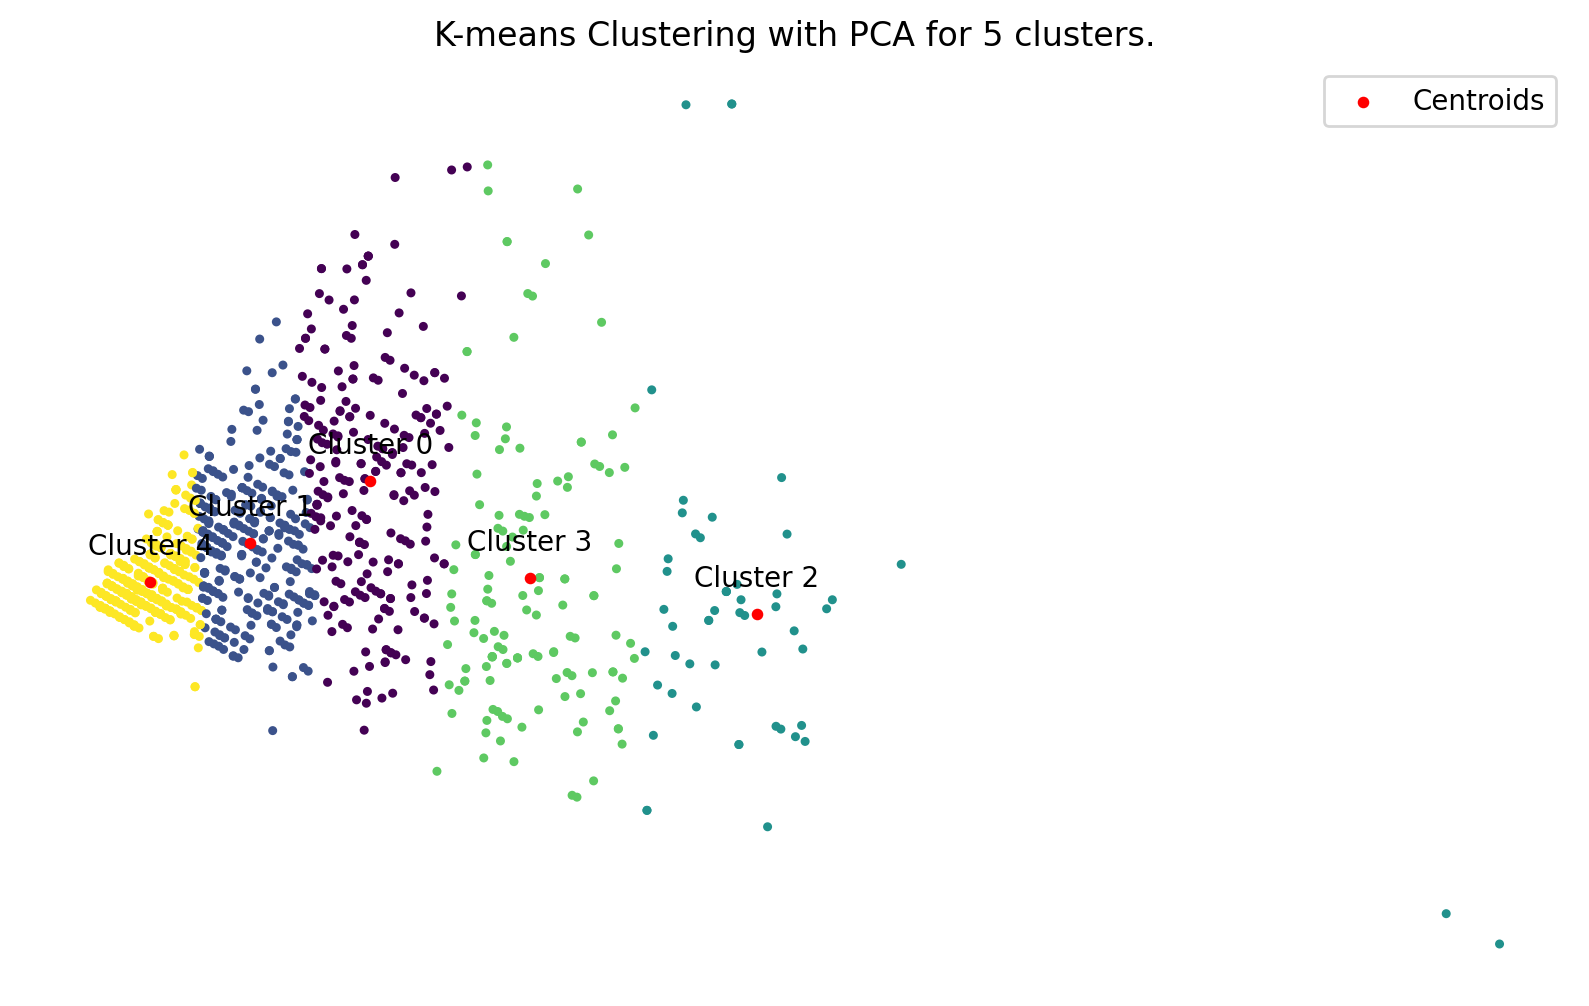

In [39]:
CLUSTER_NUMBER = 5

kmeans = KMeans(n_clusters=CLUSTER_NUMBER,init="k-means++", random_state=42, n_init="auto")

kmeans.fit(X)

# Get cluster labels
label = kmeans.labels_
# Add the cluster labels to the original dataframe
df['cluster'] = label
centroids = kmeans.cluster_centers_

# 2D Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 6))

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with PCA for {CLUSTER_NUMBER} clusters.')

# Annotate the clusters
for i, centroid in enumerate(centroids_pca):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), 
                 textcoords="offset points", xytext=(0,10), ha='center')


# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=10, c='red', label='Centroids')
plt.legend()
plt.axis("off")

plt.show()

c:\Users\rjn\miniconda3\envs\gpt\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



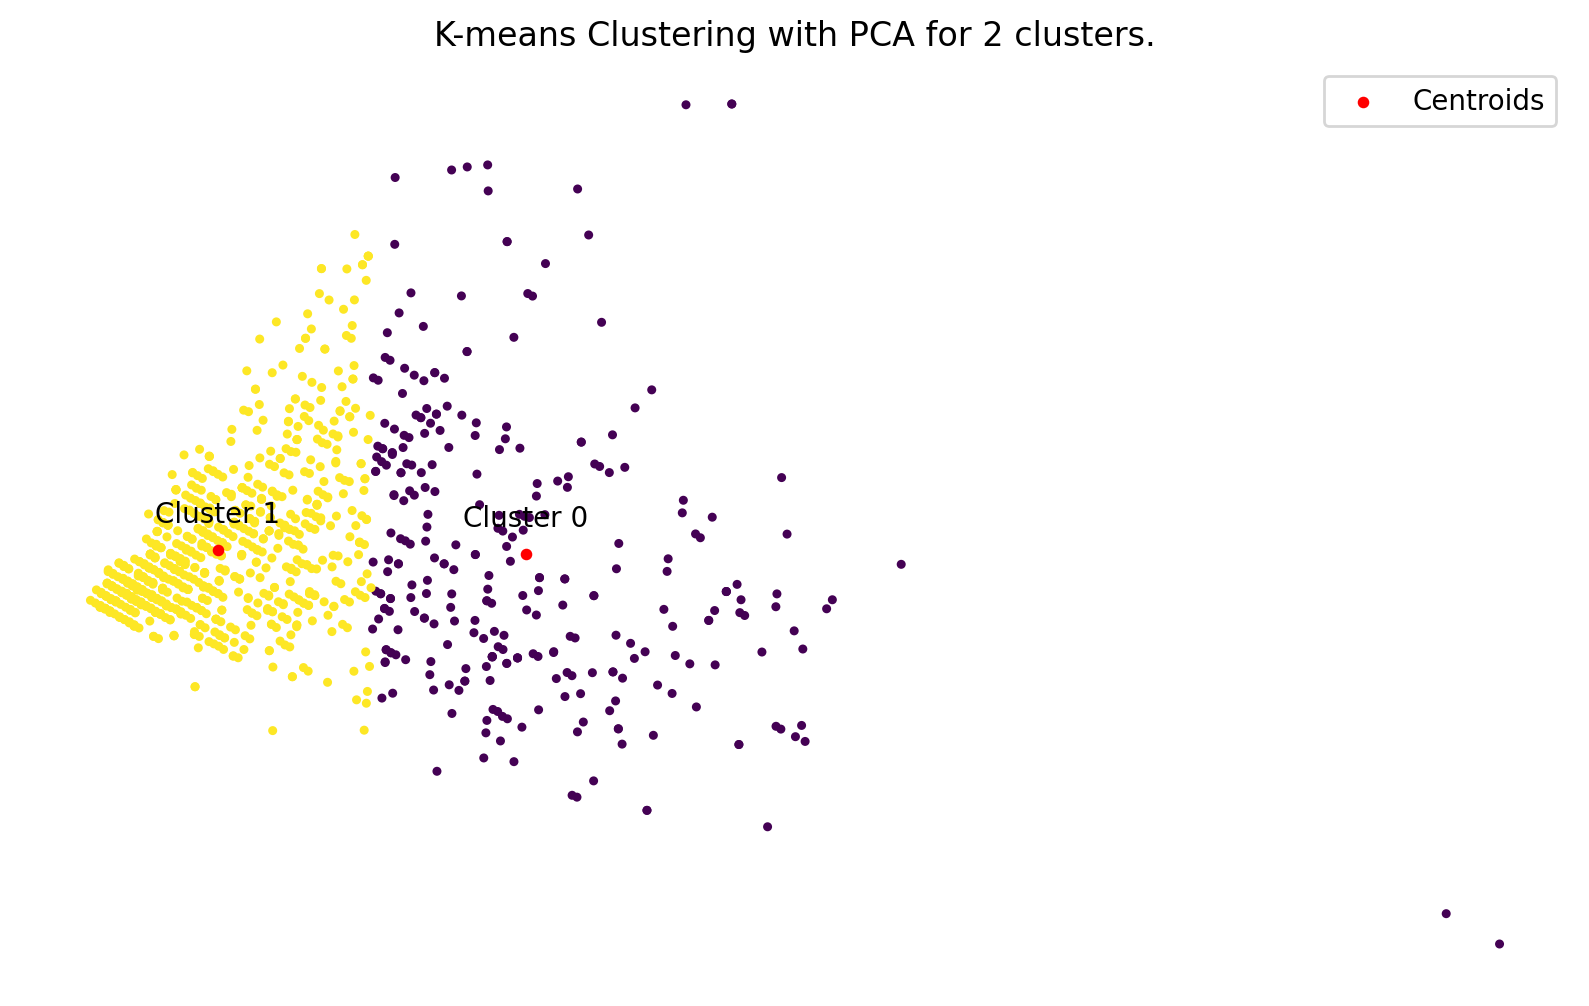

In [36]:
CLUSTER_NUMBER = 2

kmeans = KMeans(n_clusters=CLUSTER_NUMBER,init="k-means++", random_state=42, n_init="auto")
kmeans.fit(X)

# Get cluster labels
label = kmeans.labels_
# Add the cluster labels to the original dataframe
df['cluster'] = label
centroids = kmeans.cluster_centers_

# 2D Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(10, 6))

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with PCA for {CLUSTER_NUMBER} clusters.')

# Annotate the clusters
for i, centroid in enumerate(centroids_pca):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), 
                 textcoords="offset points", xytext=(0,10), ha='center')


# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=10, c='red', label='Centroids')
plt.legend()
plt.axis("off")
plt.show()

In [13]:
import plotly.express as px
import plotly.graph_objects as go


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Run K-Means clustering
kmeans = KMeans(n_clusters=CLUSTER_NUMBER, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a DataFrame for Plotly
df_pca = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df_pca['Cluster'] = labels

# Plot the 3D scatter plot
fig = px.scatter_3d(
    df_pca, 
    x='PCA Component 1', 
    y='PCA Component 2', 
    z='PCA Component 3', 
    color='Cluster',
    title='K-means Clustering with PCA',
    opacity=0.7
)

# Add centroids
fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0], 
        y=centroids[:, 1], 
        z=centroids[:, 2],
        mode='markers+text',
        marker=dict(size=5, color='red'),
        text=['Centroid {}'.format(i) for i in range(len(centroids))],
        textposition='top center'
    )
)

fig.update_layout(height=800,width=800)

fig.show()


c:\Users\rjn\miniconda3\envs\gpt\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



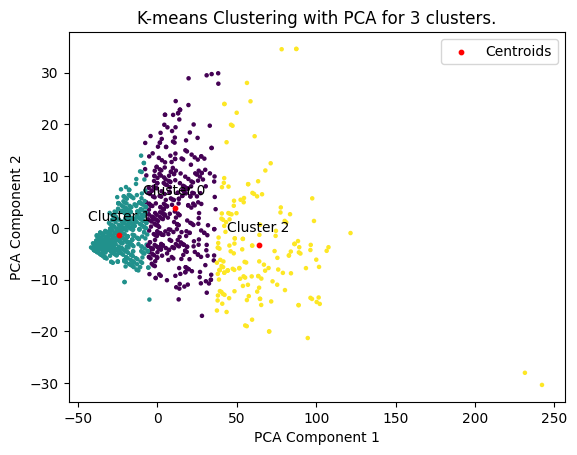

In [18]:
CLUSTER_NUMBER = 3

kmeans = KMeans(n_clusters=CLUSTER_NUMBER, random_state=42, n_init="auto")
kmeans.fit(X)

# Get cluster labels
label = kmeans.labels_
# Add the cluster labels to the original dataframe
df['cluster'] = label
centroids = kmeans.cluster_centers_

# 2D Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with PCA for {CLUSTER_NUMBER} clusters.')

# Annotate the clusters
for i, centroid in enumerate(centroids_pca):
    plt.annotate(f'Cluster {i}', (centroid[0], centroid[1]), 
                 textcoords="offset points", xytext=(0,10), ha='center')


# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=10, c='red', label='Centroids')
plt.legend()
plt.show()

In [15]:
import plotly.express as px
import plotly.graph_objects as go

CLUSTER_NUMBER = 2
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Run K-Means clustering
kmeans = KMeans(n_clusters=CLUSTER_NUMBER, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a DataFrame for Plotly
df_pca = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df_pca['Cluster'] = labels

# Plot the 3D scatter plot
fig = px.scatter_3d(
    df_pca, 
    x='PCA Component 1', 
    y='PCA Component 2', 
    z='PCA Component 3', 
    color='Cluster',
    title='K-means Clustering with PCA',
    opacity=0.7
)

# Add centroids
fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0], 
        y=centroids[:, 1], 
        z=centroids[:, 2],
        mode='markers+text',
        marker=dict(size=5, color='red'),
        text=['Centroid {}'.format(i) for i in range(len(centroids))],
        textposition='top center'
    )
)

fig.update_layout(height=800,width=800)

fig.show()


Observations

The clusters are much clearer than before.

Note

In this case, we can check the number of classes available in the dataset, because the target data is given. The data contains 6 classes and not 5 as we concluded, but two classes have very little data, for that it one of them was likely not found as a seprate pattern. The below plot shows the distribution of the target data

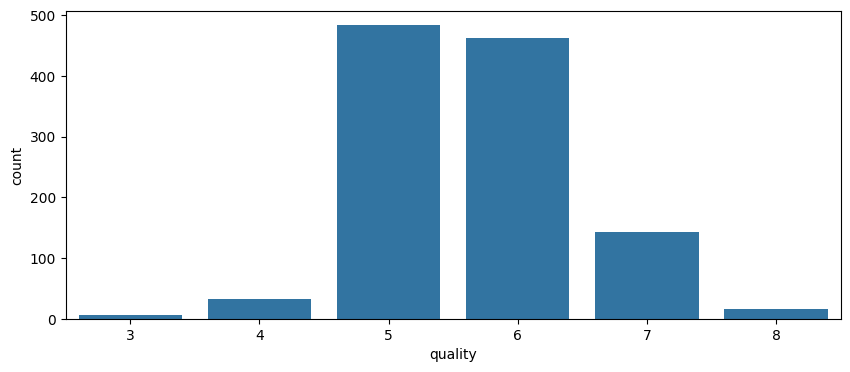

In [16]:
import seaborn as sns 
fig, ax = plt.subplots(1, 1, figsize=(10,4))
sns.countplot(x=df["quality"], ax=ax);

In [17]:
MySQL, PostgreSQL, MariaDB, SQLite, Oracle SQL

SyntaxError: invalid syntax (646234929.py, line 1)